### **Week 3**

**DATASET** <br>
https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv <br>



**METADATA** <br>
application_id: Unique identifier for each application <br>
gender: Applicant's gender (Male, Female)<br>
international: International student (TRUE/FALSE)<br>
gpa: Grade Point Average of the applicant (on 4.0 scale)<br>
major: Undergraduate major (Business, STEM, Humanities)<br>
race: Racial background of the applicant (e.g., White, Black, Asian, Hispanic, Other / null: international student)<br>
gmat: GMAT score of the applicant (800 points)<br>
work_exp: Number of years of work experience (Year)<br>
work_industry: Industry of the applicant's previous work experience (e.g., Consulting, Finance, Technology, etc.)<br>
admission: Admission status (Admit, Waitlist, Null: Deny)<br>

In [73]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

1. display 5 columns from dataset

In [56]:
#1
df = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv')
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


2. display the info column and conclude what the insight is from that column

In [57]:
#2
df.info()

#conclusion
# - Dataset ini memiliki 6194 baris dan 10 kolom
# - Kolom terdiri atas:
#   1. application_id (type integer)
#   2. gender (type object)
#   3. international (type boolean)
#   4. gpa (type float)
#   5. major (type object)
#   6. race (type object, memuat missing values karena hanya 4.352 dari 6.194 entri yang memiliki nilai di kolom ini)
#   7. gmat (type float)
#   8. work_exp (type float)
#   9. work_industry (type object)
#   10. admission (type object, memuat missing values karena hanya 1.000 dari 5.194 entri yang memiliki nilai di kolom ini)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


3. display the number of each unique value in the race and admission columns (including NaN)

In [58]:
#3a
df.admission.value_counts(dropna=False)

,count
admission,
NaN,5194
Admit,900
Waitlist,100


In [59]:
#3b
df.race.value_counts(dropna=False)

,count
race,
NaN,1842
White,1456
Asian,1147
Black,916
Hispanic,596
Other,237


4. fill NaN values in admission column to "deny" and null values in in race column to "other"

In [60]:
#4
df['admission'].fillna('Deny', inplace=True)
df['race'].fillna('Other', inplace=True)

<ipython-input-60-4c52867b0f1c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['admission'].fillna('Deny', inplace=True)
<ipython-input-60-4c52867b0f1c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

5. recheck missing value

In [61]:
#5
df.isnull().sum()

,0
application_id,0
gender,0
international,0
gpa,0
major,0
race,0
gmat,0
work_exp,0
work_industry,0
admission,0


6. drop application_id column

In [62]:
# 6
df.drop('application_id', axis=1, inplace=True)

7. show describe column and conclude what the insight is from that column

In [63]:
#7
df.describe()

#conclusion
# 1. GPA:
# - Rata-rata: 3.25
# - Standar deviasi: 0.15
# - Rentang nilai: 2.65 - 3.77
# - Kuartil: 25% memiliki GPA ≤ 3.15, Median: 3.25, 75% memiliki GPA ≤ 3.35
# 2. GMAT:
# - Rata-rata: 651.09
# - Standar deviasi: 49.29
# - Rentang nilai: 570 - 780
# - Kuartil: 25% memiliki GMAT ≤ 610, Median: 650, 75% memiliki GMAT ≤ 680
# 3. Work Experience (Pengalaman Kerja):
# - Rata-rata: 5.02 tahun
# - Standar deviasi: 1.03 tahun
# - Rentang pengalaman: 1 - 9 tahun
# - Kuartil: 25% memiliki pengalaman kerja ≤ 4 tahun, Median: 5 tahun, 75% memiliki pengalaman kerja ≤ 6 tahun

,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000
mean,3.250714,651.092993,5.016952
std,0.151541,49.294883,1.032432
min,2.650000,570.000000,1.000000
25%,3.150000,610.000000,4.000000
50%,3.250000,650.000000,5.000000
75%,3.350000,680.000000,6.000000
max,3.770000,780.000000,9.000000


8. make a visualization to analyze admission status based on major and explain the conclusions

<Figure size 2000x600 with 0 Axes>

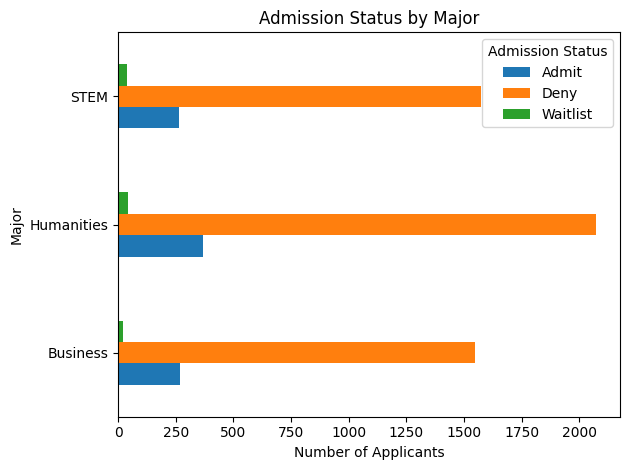

In [64]:
#8
df_major = df.groupby('major')['admission'].value_counts().unstack()

plt.figure(figsize=(20, 6))

df_major.plot(kind='barh')
plt.title('Admission Status by Major')
plt.legend(title='Admission Status', bbox_to_anchor=(1, 1), loc='upper right')
plt.xlabel('Number of Applicants')
plt.ylabel('Major')
plt.tight_layout()
plt.show()

9. make a visualization to analyze the admissions in each major based on gender and explain the conclusions

Text(0, 0.5, 'Major')

<Figure size 1000x600 with 0 Axes>

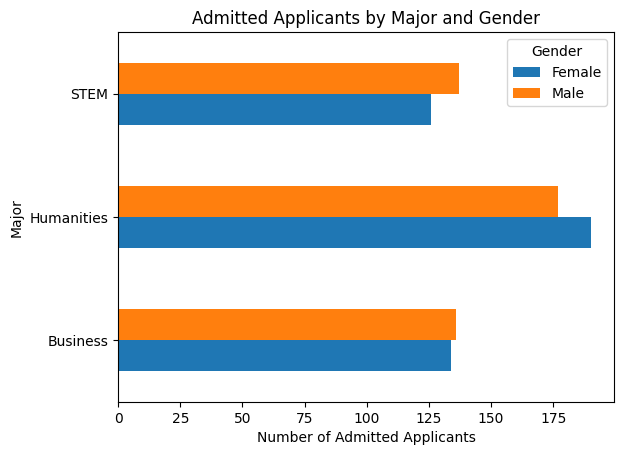

In [65]:
#9
df_gender = df[df['admission'] == 'Admit'].groupby(['major', 'gender'])['gender'].count().unstack()

plt.figure(figsize=(10, 6))
df_gender.plot(kind='barh')
plt.legend(title='Gender')
plt.title('Admitted Applicants by Major and Gender')
plt.xlabel('Number of Admitted Applicants')
plt.ylabel('Major')

10. create your own insightful visualization and explain it in at least 2 sentences

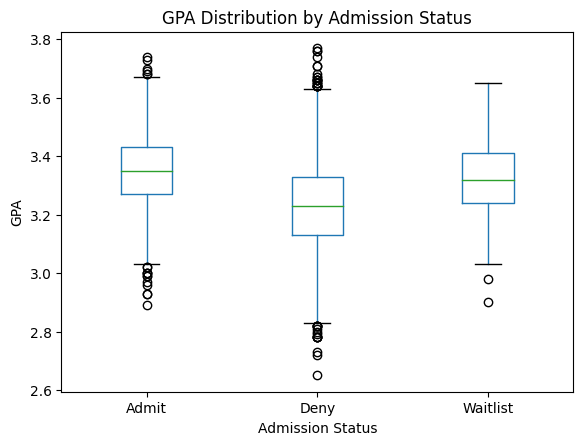

In [66]:
#10
df.boxplot(column='gpa', by='admission', grid=False)
plt.title('GPA Distribution by Admission Status')
plt.suptitle('')
plt.ylabel('GPA')
plt.xlabel('Admission Status')
plt.show()

# Explanation
# Visualisasi ini menunjukkan bahwa nilai GPA memiliki pengaruh signifikan dalam keputusan admission status,
# dimana siswa yang diterima memiliki nilai GPA yang lebih tinggi dibandingkan dengan yang ditolak atau waitlist.
# Namun, visualisasi ini juga menunjukkan bahwa nilai GPA tidak menjadi satu-satunya faktor penentu, karena ada
# siswa dengan nilai GPA tinggi yang ditolak dan siswa dengan nilai GPA rendah yang diterima.

11. create your own insightful visualization and explain it in at least 2 sentences

<Figure size 800x600 with 0 Axes>

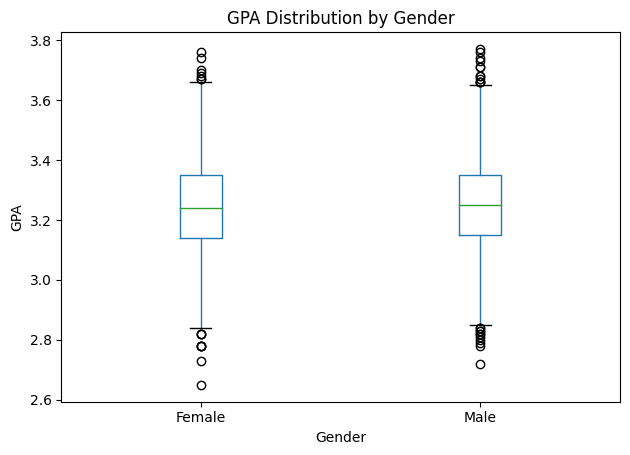

In [67]:
#11
plt.figure(figsize=(8, 6))
df.boxplot(column='gpa', by='gender', grid=False)

plt.title('GPA Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('GPA')
plt.suptitle('')
plt.tight_layout()
plt.show()

# Explanation
# Grafik ini menunjukkan bahwa distribusi IPK perempuan dan laki-laki secara keseluruhan hampir sama,
# memiliki variasi data yang cukup besar dan beberapa nilai outlier. Namun, terdapat beberapa perbedaan
# kecil dalam median dan kuartil, yang menunjukkan bahwa perempuan memiliki IPK yang sedikit lebih rendah
# daripada laki-laki.

12. encode categorical columns and display the results

In [68]:
#12a
#encode X
label_encoder = LabelEncoder()

# Encode categorical columns
categorical_cols = ['gender','international','major', 'race', 'work_industry']
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

df.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,Admit
1,1,0,3.28,1,1,680.0,5.0,6,Deny
2,0,1,3.30,0,3,710.0,5.0,13,Admit
3,1,0,3.47,2,1,690.0,6.0,13,Deny
4,1,0,3.35,2,2,590.0,5.0,1,Deny


In [72]:
#12b
#encode y

admission_dict = {'Admit': 0, 'Deny': 1, 'Waitlist': 2}
df['admission'] = df['admission'].replace(admission_dict)
df.head()

<ipython-input-72-67cb881e94ea>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['admission'] = df['admission'].replace(admission_dict)


,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,0
1,1,0,3.28,1,1,680.0,5.0,6,1
2,0,1,3.30,0,3,710.0,5.0,13,0
3,1,0,3.47,2,1,690.0,6.0,13,1
4,1,0,3.35,2,2,590.0,5.0,1,1


13. create a heatmap to see the correlation and explain the conclusion

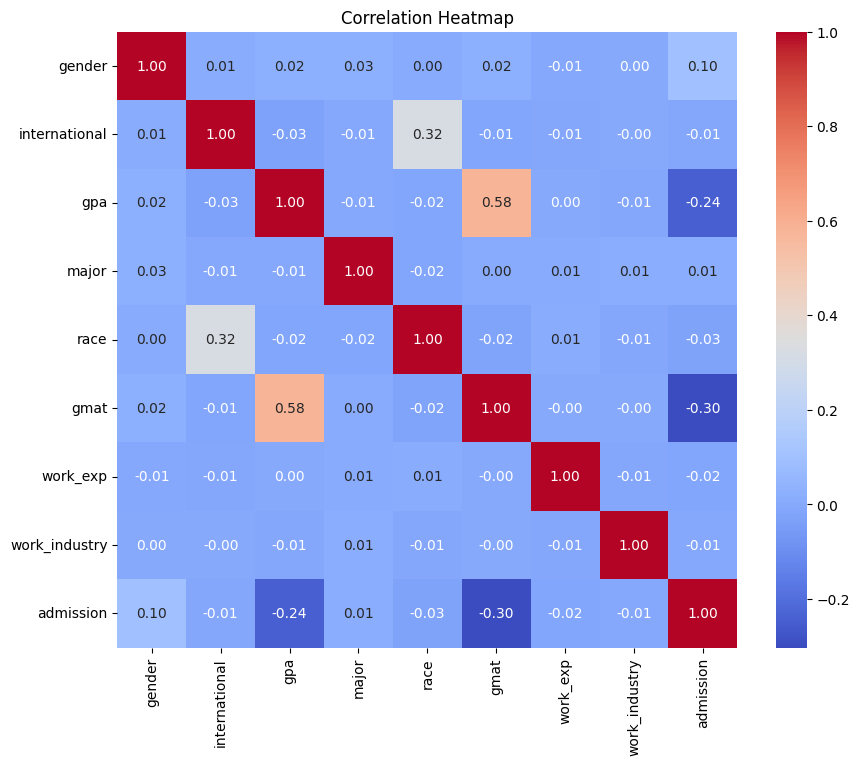

In [74]:
#13
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#Conclusion
# Strong Positive Correlations:
# - gmat & admission (1.00): Skor GMAT yang lebih tinggi berkorelasi kuat dengan kemungkinan penerimaan yang lebih tinggi
# Moderate Positive Correlations:
# - gpa & gmat (0.58): Hal ini menunjukkan bahwa siswa dengan IPK yang lebih tinggi cenderung berprestasi lebih baik pada GMAT, yang menunjukkan hubungan positif antara kinerja akademis dan skor tes standar.
# - race & international (0.32): Hal ini menunjukkan proporsi siswa internasional yang lebih tinggi mungkin termasuk dalam kelompok ras tertentu.
# Weak Correlations:
# - Sebagian besar pasangan variabel lainnya menunjukkan korelasi yang sangat lemah, mendekati nol.

**Challenge! Get Extra 10 Points**<br>

get extra 10 points if you can help Lisa predict whether she will be accepted or not.
Lisa is a local student, Lisa's gpa is the average of all applicants, during her undergraduate Lisa studied entrepreneurship, Lisa has an Asian race, gmat score 580, has worked from 2018 to 2020 as a finance.

In [71]:
#Challenge

